# Machine Problem 1: Parameter Estimation
**Instructions:** Propose the best distribution that best models the given data. To be systematic, you may adopt the following methodology in presenting your results:
- **Step 1.** Visualize the data using a histogram to determine the "most likely" distribution of the data.
- **Step 2.** Determine the probability mass function (or probability density function) of the speculated discrete (or continuous) distribution.
- **Step 3.a** Compute the parameters of the p.m.f. (or p.d.f) using:
    - Method of Moments (MoM)
    - Maximum Likelihood Estimation (MLE)
- **Step 3.b** Determine if the MoM and MLE yield the same estimates. If the estimates are different, select either of the two and justify your choice.
- **Step 4.a** Generate simulated data, $\hat{X}$, by drawing random samples from the model (i.e., the distribution with the estimated parameters).
- **Step 4.b** Compare the original data $X$ with the simulated data $\hat{X}$ to check if they come from the same distribution.
- **Step 5** If they come from the same distribution, propose the model. Otherwise, return to **<em>Step 2</em>**.

You are provided with the following functions (written in JULIA) that can help you diagnose the model:
- **<em>plot_reconstruction</em>** plots the original data against the simulated data.
- **<em>get_p_val</em>** computes the p-value when comparing the original data and the simulated data using the <em>Approximate Two Sample Kolmogorov-Smirnov Test</em>. <em> Note: the null hypothesis of this test states that the compared groups are drawn from the same distribution.</em>
- **<em>if_dist_different</em>** extends **<em>get_p_val</em>** with a decision on whether or not there is sufficient evidence to reject the null hypothesis.

In [1]:
### Write the PMF and PDF here

In [2]:
function plot_reconstruction(orig_data, recon_data, bins=100)
    p_val = get_p_val(orig_data, recon_data)
    if p_val < 0.0001
        p_label = "< 0.0001"
    else
        p_label = "=$p_val"
    end
    p1 = histogram(orig_data, bins=bins, normalize=:true,color=:red, label="Original")
    p2 = histogram(recon_data, bins=bins, normalize=:true,color=:green, label="Reconstruction (p "* p_label * ")")
    fig = plot(p1,p2, layout=(2,1))
    display(fig)
end

function get_p_val(original, reconstruction,precision=3)
    z = ApproximateTwoSampleKSTest(original, reconstruction)
    p = pvalue(z)
    return round(p, digits=precision)
end

function if_dist_different(original, reconstruction, alpha=0.05)
    p = get_p_val(original, reconstruction)
    if p <= alpha
        if p >= 0.0001
            print("The two distributions are significantly different (p = $p)")
        else
            print("The two distributions are significantly different (p < 0.0001)")
        end
    else
        print("The two distributions are not significantly different (p = $p)")   
    end
end

if_dist_different (generic function with 2 methods)

In [3]:
### This loads the libraries needed for this exercise
using Distributions
using Plots
using CSV
using DataFrames
using HypothesisTests

## Example

In [4]:
norm_d = Normal(100, 15)
num_samples = 10000
X = rand(norm_d, num_samples);

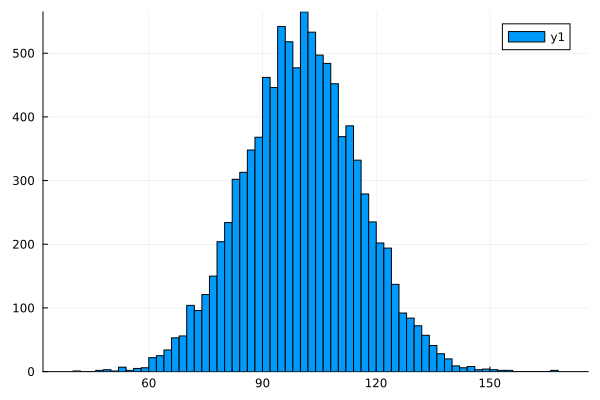

In [5]:
## Step 1
fig1 = plot()
histogram(X,bins=100)

In [6]:
## Step 2: "data is likely normal"..Use the p.d.f. of the univariate normal dist.

In [7]:
## Step 3.a.: Compute the estimates using MLE or MoM. Code the estimators as functions. 
function mle_mean_normal(samples)
    return mean(samples)
end

function mle_std_normal(samples)
    return std(samples)
end

mle_std_normal (generic function with 1 method)

In [8]:
## Step 3.b. They should be the same in this case

In [9]:
## Step 4.a
μ̂ = mle_mean_normal(X)
σ̂ = mle_std_normal(X)
sim_d = Normal(μ̂,σ̂)
X̂ = rand(sim_d, 10000);

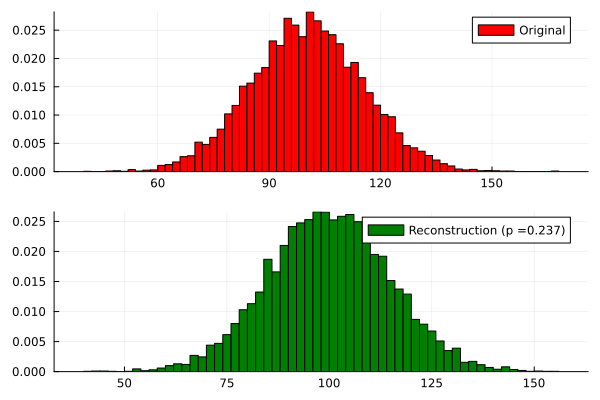

The two distributions are not significantly different (p = 0.237)

In [10]:
## Step 4.b
plot_reconstruction(X, X̂)
if_dist_different(X, X̂)

In [11]:
## Step 5. The test suggests that the two datasets are drawn from the same distribution. Thus, we will propose the estimates derived by the MLE and MoM

# Exercise 1

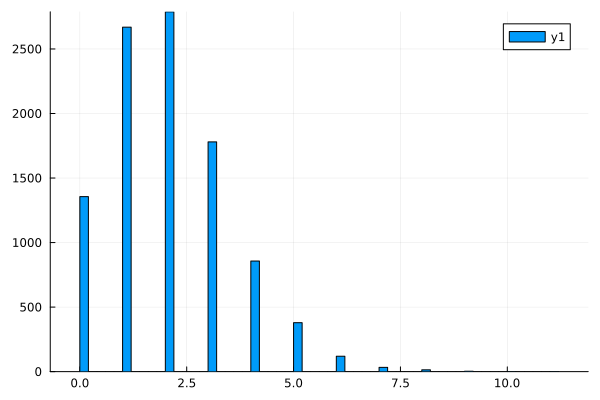

In [12]:
dataset = CSV.read("ex1_data.csv", DataFrame);

## Step 1
ex1_plot = plot()
histogram(dataset.Value, bins = 50)

In [13]:
## Step 2: The first dataset is likely to follow a Poisson distribution.


**Estimating $\lambda$ using Maximum Likelihood Estimation**

  

The PMF of Poisson Distribution is:

$$ P\left( x | \lambda  \right) = \frac{\lambda  ^x {e^{  -  \lambda  }  }}{{x!}}$$

  

Building the Likelihood Function

$$L\left(p | \lambda  \right) = P(X_1 = x_1, X_2 = x_2, ..., X_n = x_n | \ p)  $$

  

$$L\left(p | \lambda  \right) = \Pi^n_{i=1} f(X_i | \ \lambda)  $$

  

$$L\left(p | \lambda  \right) = \Pi^n_{i=1}  \frac{\lambda  ^{x_i}  {e^{  -  \lambda  }  }}{{x_i!}}$$

  

Log Likelihood Function

  

$$ l(\lambda | \xi) = ln (\Pi^n_{i=1}  \frac{\lambda  ^{x_i}  {e^{  -  \lambda  }  }}{{x_i!}})  $$

  

$$ l(\lambda | \xi) = \sum^n_{i=1} ln (\frac{\lambda  ^{x_i}  {e^{  -  \lambda  }  }}{{x_i!}})  $$

  

$$ l(\lambda | \xi) = \sum^n_{i=1} \ [ln(\lambda  ^{x_i})  + ln(e^{  -  \lambda  }  )  - ln(x_i!)  $$

  

$$ l(\lambda | \xi) = \sum^n_{i=1} \ [x_i ln (\lambda)  -  \lambda\ln(e)  - ln(x_i!)] $$

  

$$ l(\lambda | \xi) = -n \ \lambda  + ln (\lambda)  \sum^n_{i=1}x_i -  \sum^n_{i=1}ln(x_i!)  $$

  

Computing the MLE

$$  \frac{\partial l}{\partial\lambda} = \frac{\partial l }{\partial\lambda}  -n \ \lambda  +  \frac{\partial l}{\partial\lambda} ln (\lambda)  \sum^n_{i=1}x_i -  \frac{\partial l}{\partial\lambda}\sum^n_{i=1}ln(x_i!)  $$

  

$$  0 = -n +  \frac{1}{\lambda} \ \sum^n_{i=1}x_i $$

  

$$  -  \frac{1}{\lambda} \ \sum^n_{i=1}x_i = -n$$

  

$$  \lambda^{-1} = \frac{n}{\sum^n_{i=1}x_i }$$

  

$$  \lambda = \frac{\sum^n_{i=1}x_i}{n}$$

**Estimating $\lambda$ using Method of Moments**

In Poisson Distribution, it only involves a single parameter $\lambda$.

Let
$$\mu = \bar{x}$$

$$\mu = \mathbb{E}[X]$$

$$\bar{x} = M_1 = \frac{1}{n} \sum^n_{i=1} X_i$$

$$\mathbb{E}[X] = M_1 = \frac{1}{n} \sum^n_{i=1} X_i = \lambda$$ 

Therefore, $\lambda \approx \hat{\lambda} = \frac{\sum_{i=1}^{n} X_{i}}{n}$.

In [14]:
## Step 3.a: Compute the estimates using MLE and MoM. Code the estimators as functions. 

function mle_lambda_poisson(samples)
    n = length(samples)
    sum_X = sum(samples)
    return sum_X / n
end

function mom_lambda_poisson(samples)
    n = length(samples)
    sum_X = sum(samples)
    return sum_X / n
end

mom_lambda_poisson (generic function with 1 method)

In [15]:
## Step 3.b Determine if the MoM and MLE yield the same estimates.
mom_p = mom_lambda_poisson(dataset.Value)
println("MoM Estimator for 	λ : $mom_p")

mle_p = mle_lambda_poisson(dataset.Value)
println("MLE Estimator for 	λ : $mle_p")

MoM Estimator for 	λ : 2.0013
MLE Estimator for 	λ : 2.0013


In [16]:
## Step 4.a 
p = mle_lambda_poisson(dataset.Value)
println(p)

simulated_data = Poisson(p)
dataset_value = rand(simulated_data, 10000);

2.0013


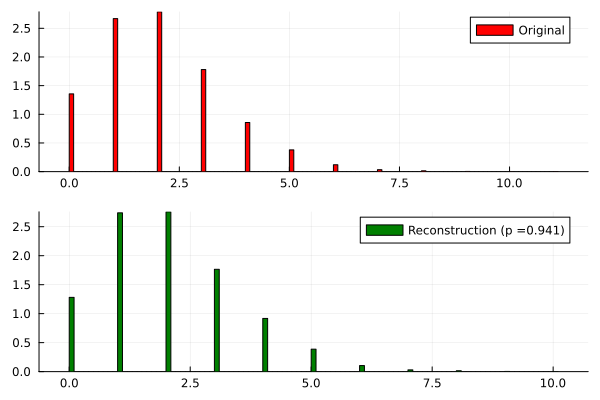

The two distributions are not significantly different (p = 0.941)

In [17]:
## Step 4.b
plot_reconstruction(dataset.Value, dataset_value)
if_dist_different(dataset.Value, dataset_value)

In [18]:
## Step 5. The test suggests that the two datasets are drawn from the same distribution. Thus, we will propose the estimates derived by the MLE and MoM.

# Exercise 2

In [19]:
dataset = CSV.read("ex2_data.csv", DataFrame);

# Exercise 3

In [20]:
dataset = CSV.read("ex3_data.csv", DataFrame);

# Exercise 4

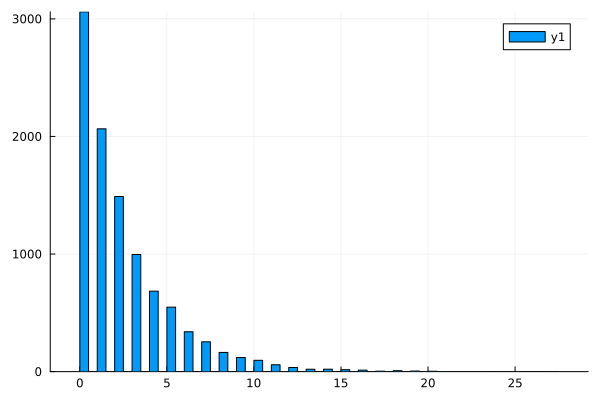

In [21]:
dataset = CSV.read("ex4_data.csv", DataFrame)
fig4 = plot()
val = dataset.Value
histogram(val)

In [22]:
## Step 2: data have gaps in between, thus consists of distinct, separate values, hence the distribution is a probability mass function and follows a geometric distribution.

Step 3a: 
**Maximum Likelihood Estimation**
$$P(X=x) = (1-p)^{x_{i}} p  ;  for  x = 1,2,3,...$$

$$L(p|\xi) = \prod_{i=1}^{n} p(x_{i} | p)$$
$$L(p|\xi) = \prod_{i=1}^{n} (1-p)^{x_{i}} p$$
$$L(p|\xi) = \prod_{i=1}^{n} (1-p)^{x_{i}} \cdot \prod_{i=1}^{n}p$$
$$L(p|\xi) = (1-p)^{\sum_{i=1}^{n}x_{i}} \cdot p^{n}$$

$$l(p) = ln (L(p|\xi))$$
$$l(p) = ln [(1-p)^{\sum_{i=1}^{n}x_{i}} \cdot p^{n}]$$
$$l(p) = ln [(1-p)^{\sum_{i=1}^{n}x_{i}}] + ln[p^{n}]$$
$$l(p) = ln (1-p){\sum_{i=1}^{n}x_{i}} + nln(p)$$

$$\frac{\partial l(p)}{\partial p} = -\frac{1}{(1-p)} {\sum_{i=1}^{n}x_{i}} + \frac{n}{p}$$


$$\frac{\partial^2 l(p)}{\partial p^2} = -\frac{1}{(1-p)^2} {\sum_{i=1}^{n}x_{i}} - \frac{n}{p^2}$$


$$\frac{1}{(1-\hat{p})^2} {\sum_{i=1}^{n}x_{i}} = \frac{n}{\hat{p}^2}$$
$$\frac{1}{n} {\sum_{i=1}^{n}x_{i}} = \frac{1-\hat{p}}{\hat{p}}$$
$$\bar{x}{n} = \frac{1}{\hat{p}} -1$$
$$\hat{p} = \frac{1}{1+\bar{x}_{n}}$$

In [23]:
## Step 3.a.: Compute the estimates using MLE and MoM. Code the estimators as functions. 

function mom_estimator(values)
    p_mom = 1 / (1+mean(values))
    return p_mom
end

function mle_estimator(values)
    p_mle = 1/ (1+mean(values))
    return p_mle
end

mle_estimator (generic function with 1 method)

In [24]:
## Step 3.b Determine if the MoM and MLE yield the same estimates.
mom_p = mom_estimator(val)
println("MoM Estimator for p: $mom_p")

mle_p = mle_estimator(val)
println("MLE Estimator for p: $mle_p")


MoM Estimator for p: 0.3013500482160077
MLE Estimator for p: 0.3013500482160077


In [25]:
## Step 4.a
X = val
num_simulations = length(X)
simulated_d = Geometric(mom_p)
X̂ = rand(simulated_d, num_simulations);

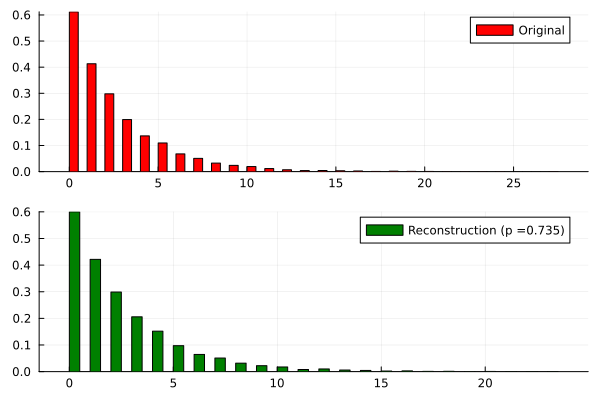

The two distributions are not significantly different (p = 0.735)

In [26]:
## Step 4.b
plot_reconstruction(X, X̂)
if_dist_different(X, X̂)

In [27]:
## Step 5. The test suggests that the two datasets are drawn from the same distribution. Thus, we will propose the estimates derived by the MLE and MoM

# Exercise 5

In [28]:
dataset = CSV.read("ex5_data.csv", DataFrame);